In [29]:
import math
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm, chisquare, chi2

In [30]:
variationSeries= list()

with open("data46.txt", "r") as file:
    for value in file:
        variationSeries.append(float(value))
print(variationSeries)
minValue = min(variationSeries)
maxValue = max(variationSeries)
R = maxValue-minValue
print(minValue)
print(maxValue)
print(R)
N = int(1+3.32*math.log10(100) +1)
h = (maxValue-minValue)/N
X = sum(variationSeries)/100
sSquared=0
for i in variationSeries:
    sSquared+=pow(i-X, 2)
sSquared/=100
print(sSquared)
print(X)
print(N)
print(h)

[6.22474, 7.9615, 6.24638, 6.92865, 8.22718, 9.77768, 6.03872, 7.41538, 5.97641, 7.11427, 9.74402, 7.13052, 8.42015, 7.60795, 7.34043, 9.23456, 6.26545, 8.29636, 6.18477, 7.49341, 8.50659, 5.28257, 7.37141, 7.21586, 8.46703, 8.64981, 7.38393, 5.64386, 8.22729, 5.57184, 5.20766, 8.57435, 6.23867, 8.2051, 8.03713, 4.14542, 7.02945, 4.21484, 6.16042, 5.92908, 6.67382, 7.40483, 6.58906, 8.22923, 6.77062, 7.48979, 7.14634, 7.63426, 4.39408, 5.11592, 7.10439, 5.39731, 6.11413, 6.87196, 7.82931, 9.50154, 7.79233, 6.73955, 6.93967, 8.24075, 6.10367, 8.3432, 7.9052, 8.44762, 5.02805, 9.66311, 10.2255, 5.81853, 8.56614, 6.8129, 4.88484, 5.24959, 5.89844, 7.61241, 7.84535, 7.92915, 8.2505, 7.44187, 6.4254, 6.58928, 5.73251, 6.38393, 6.04631, 7.28425, 6.48259, 7.70148, 7.50626, 7.63987, 7.32573, 7.24227, 8.58262, 6.83937, 3.85739, 7.8757, 6.08697, 7.49422, 6.82719, 8.88691, 6.11439, 7.43002]
3.85739
10.2255
6.36811
1.6570725243688398
7.100504600000002
8
0.79601375


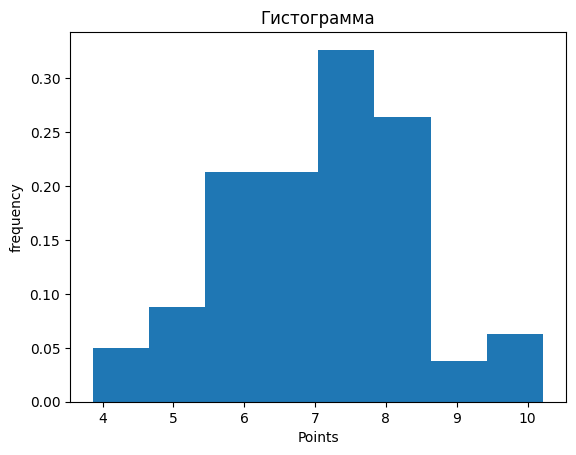

In [31]:
plt.title('Гистограмма')
plt.xlabel('Points')
plt.ylabel('frequency')
plt.hist(x=variationSeries, bins=N, density=True)
plt.show()

[4.255396875, 5.051410625, 5.847424375, 6.643438125, 7.4394518750000005, 8.235465625, 9.031479375, 9.827493125]


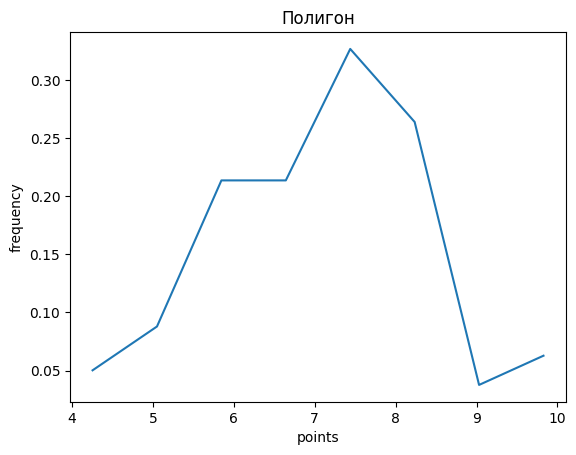

In [32]:
pointsVal = list()
x = minValue
histVal = [0.050250388, 0.087938179,0.213564149,0.213564149,0.326627522,0.263814537,0.037687791,0.062812985]
for i in range(1,9):
    pointsVal.append(x+h/2)
    x=x+h
print(pointsVal)
plt.plot(pointsVal, histVal)
plt.xlabel("points")
plt.ylabel("frequency")
plt.title("Полигон")
plt.show()

In [46]:
def gausFunc(x):
    return math.exp(-(x**2)/2)
X = 7.100504600000002
S = math.sqrt(sSquared)
intervals = [3.85739, 4.65340375, 5.4494175, 6.245431, 7.041445, 7.8374587, 8.6334725, 9.42948625, 10.2255]
Pk = list()
for i in range(0, 8):
    Pk.append(norm.cdf((intervals[i+1]-X)/S)-norm.cdf((intervals[i]-X)/S))
print(Pk)
PkSum = sum(Pk)
print(PkSum)
freq = [4,7,17,17,26,21,3,5]
xiSquared = 0
for i in range(0,8):
    xiSquared += (freq[i] - 100*Pk[i])**2/(100*Pk[i])
print(xiSquared)
criticValue = chi2.ppf(1-0.1, N-1)
print(criticValue)

    


[0.022773002484320237, 0.07116069419236451, 0.15345259327219096, 0.2284385193836126, 0.2348026616492575, 0.16664082010797865, 0.08164627126103807, 0.027607772169470746]
0.9865223345202332
9.460179491439591
12.017036623780532


In [53]:
X = 7.100504600000002*10
Pk = list()
intervals = [3.85739, 4.65340375, 5.4494175, 6.245431, 7.041445, 7.8374587, 8.6334725, 9.42948625, 10.2255]
for i in range(0, 8):
    Pk.append(norm.cdf((intervals[i+1]-X)/S)-norm.cdf((intervals[i]-X)/S))
xiSquared = 0
for i in range(0,8):
    if Pk[i] < 0.0:
        Pk[i] = 0.0
    if Pk[i] == 0.0:
        xiSquared = math.inf
    else: 
        xiSquared += (freq[i] - 100*Pk[i])**2/(100*Pk[i])
print(Pk)
PkSum = sum(Pk)
print(PkSum)
print(xiSquared)
criticValue = chi2.ppf(1-0.1, N-1)
print(criticValue)




[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0
inf
12.017036623780532


In [57]:
X = 7.100504600000002
S = S = math.sqrt(sSquared*10)
Pk = list()
intervals = [3.85739, 4.65340375, 5.4494175, 6.245431, 7.041445, 7.8374587, 8.6334725, 9.42948625, 10.2255]
for i in range(0, 8):
    Pk.append(norm.cdf((intervals[i+1]-X)/S)-norm.cdf((intervals[i]-X)/S))
print(Pk)
for i in Pk:
    print(i)
PkSum = sum(Pk)
print(PkSum)
xiSquared = 0
for i in range(0,8):
    xiSquared += (freq[i] - 100*Pk[i])**2/(100*Pk[i])
print(xiSquared)
criticValue = chi2.ppf(1-0.1, N-1)
print(criticValue)


[0.061056454876008914, 0.06864698072399394, 0.07429460163542867, 0.07739975899438012, 0.07761892939922083, 0.07492763602478969, 0.06962455777656185, 0.062277188922179705]
0.061056454876008914
0.06864698072399394
0.07429460163542867
0.07739975899438012
0.07761892939922083
0.07492763602478969
0.06962455777656185
0.062277188922179705
0.5658461083525638
93.83681861262409
12.017036623780532
